In [5]:
import create_model
import numpy as np
# Change simulation parameters here
temperature = 25  # in degC, valid values: 0, 10, 25
crate = 1         # valid values: 0.5, 1, 2
cells_ignore = ["789","791","790"]   # cells to ignore, in this case we ignore cell 791 because the data for that cell is faulty

In [6]:
model=create_model.model_build(temperature,crate,cells_ignore)
x0 =np.array([5e-14,6.48e-7,20,2.85e3])
# Create bounds
max_bound = np.array([ 2.06e-12, 2.18589831e-5,1000,2.85e6])
min_bound = np.array([ 2.06e-16, 2.18589831e-9,0.1,2.85])
bounds = (min_bound, max_bound) #bounds of the variable optimized
model.fitness(x0) #initial value of the function

array(0.01335823)

In [7]:
%time
from scipy import optimize
minimum = optimize.fmin(model.fitness, x0, xtol=1e-6, ftol=1e-6)

CPU times: total: 0 ns
Wall time: 0 ns


2022-03-25 14:55:28,506 - [WARNING] processed_variable.__call__(485): Calling variable outside interpolation range (returns 'nan')
2022-03-25 14:55:28,580 - [WARNING] processed_variable.__call__(485): Calling variable outside interpolation range (returns 'nan')
2022-03-25 14:55:30,279 - [WARNING] processed_variable.__call__(485): Calling variable outside interpolation range (returns 'nan')
2022-03-25 14:55:30,350 - [WARNING] processed_variable.__call__(485): Calling variable outside interpolation range (returns 'nan')
2022-03-25 14:55:40,222 - [WARNING] processed_variable.__call__(485): Calling variable outside interpolation range (returns 'nan')
2022-03-25 14:55:40,296 - [WARNING] processed_variable.__call__(485): Calling variable outside interpolation range (returns 'nan')


Optimization terminated successfully.
         Current function value: 0.001467
         Iterations: 184
         Function evaluations: 374


Initial function value: 0.013358230618606796
Optimized function value: 0.001466677395463786
Optimized values are: [2.32461416e-14 3.39740830e-07 2.24488342e+01 1.59150761e+03]


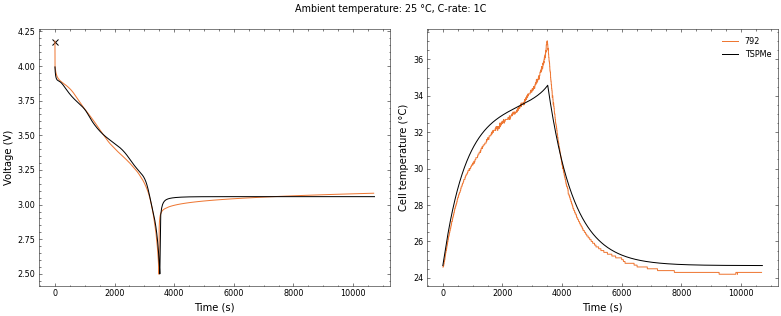

In [8]:
print("Initial function value: %s" %model.fitness(x0))

print("Optimized function value: %s" %model.fitness(minimum))

print("Optimized values are: %s" %minimum)

model.define_model(minimum)

model.model_plot()